In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

random_seed = 45

matplotlib.rcParams.update({'font.size': 16})

In [3]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43
np.random.seed(random_seed)

In [4]:
# Create true weights for our dependence
w_true = np.random.normal(size=(n_features,))
print(f"True weights are {w_true}\n")

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features)*2+1)[np.newaxis, :]

# True target array
Y = X.dot(w_true) + np.random.normal(-1, 1, n_objects)
print(f'The covariation between X1 and X2 is \n{np.cov(X[:,0], X[:, 1])}')

True weights are [0.02637477 0.2603217 ]

The covariation between X1 and X2 is 
[[ 8.65712898  1.30660824]
 [ 1.30660824 71.87675261]]


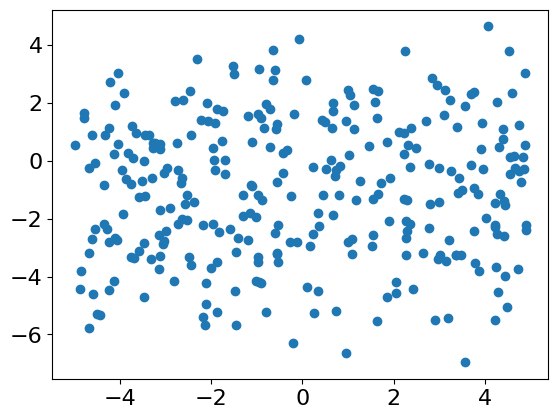

In [5]:
plt.scatter(X[:,0], Y)

In [6]:
#Analytical solution w_star
w_star = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(Y)

print(f'The result of analytical solution - {w_star}')

The result of analytical solution - [0.00825119 0.25754316]


What happend if there will be a correlation between features

In [7]:
n_features = 3
n_objects = 300
batch_size = 10
num_steps = 43
np.random.seed(random_seed)
eps = 1e-3

In [8]:
# Create true weights for our dependence
w_true = np.random.normal(size=(n_features,))
print(f"True weights are {w_true}\n")

X = np.random.uniform(-5, 5, (n_objects, n_features))
X[:, -1] = X[:, -2] + np.random.uniform(-eps, eps, size=X[:,-2].shape) 

# True target array
Y = X.dot(w_true) + np.random.normal(-1, 1, (n_objects))
print(f'The covariation between X1 and X2 is \n{np.cov(X[:,0], X[:, 1])}')

True weights are [ 0.02637477  0.2603217  -0.39514554]

The covariation between X1 and X2 is 
[[8.23142108 0.59940123]
 [0.59940123 8.77517906]]


In [9]:
#Analytical solution w_star
w_star = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(Y)

print(f'The result of analytical solution - {w_star}')

The result of analytical solution - [ 2.82305331e-02  4.27297406e+01 -4.28527517e+01]


In [10]:
print(f"Check the sums of true and analytical weights {w_true[1:].sum()} and {w_star[1:].sum()}")

Check the sums of true and analytical weights -0.13482384009514226 and -0.12301109143891154


In [11]:
w_star_reg2 = np.linalg.inv(np.dot(X.T, X) + 0.05*np.eye(n_features)).dot(X.T).dot(Y)
print(f'The result of analytical solution - {w_star_reg2}')

The result of analytical solution - [ 0.0281108  -0.01930966 -0.10389953]


In [12]:
print(f"Check true and analytical with regulisation weights {w_true} and {w_star_reg2}")

Check true and analytical with regulisation weights [ 0.02637477  0.2603217  -0.39514554] and [ 0.0281108  -0.01930966 -0.10389953]


In [13]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43
random_seed = 30
np.random.seed(random_seed)

# Create true weights for our dependence
w_true = np.random.normal(size=(n_features,))
print(f"True weights are {w_true}\n")

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features)*2+1)[np.newaxis, :]

# True target array
Y = X.dot(w_true) + np.random.normal(-1, 1, (n_objects))
print(f'The covariation between X1 and X2 is \n{np.cov(X[:,0], X[:, 1])}')

True weights are [-1.26405266  1.52790535]

The covariation between X1 and X2 is 
[[ 8.58981631 -0.50738663]
 [-0.50738663 75.44565155]]


In [14]:
w_0 = np.random.normal(size=(n_features,))
w = w_0.copy()
w_list = [w.copy()]
lr = 1e-2

for i in range(num_steps):
    w -= lr * 2.0 * np.dot(X.T, X.dot(w) - Y) / Y.size
    w_list.append(w.copy())
w_list = np.array(w_list)


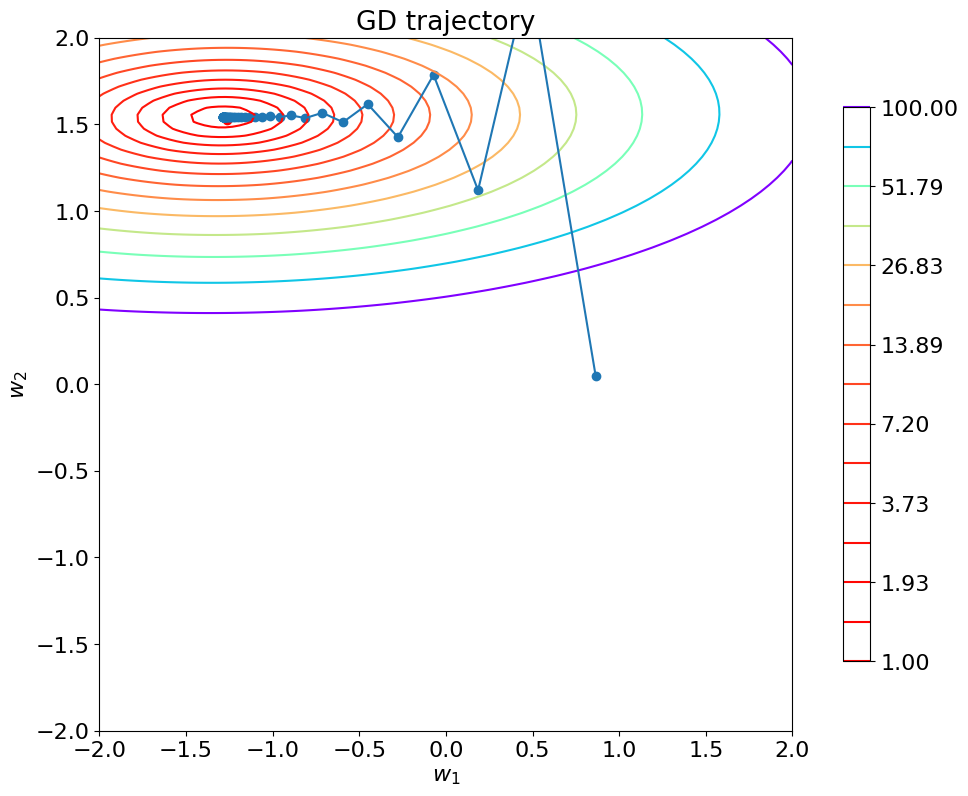

In [15]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Write 2 functions for gradient descent (GD) and stochastic gradient descent (SGD)

In [16]:
def get_w_by_grad(X, Y, num_steps, w_0, lr):
    w = w_0.copy()
    for i in range(num_steps):
        w -= lr * 2.0 * np.dot(X.T, X.dot(w) - Y) / Y.size
    return w

def get_w_by_stoch_grad(X, Y, num_steps, w_0, lr_0, n_objects):
    w = w_0.copy()
    lr_0 = 0.45
    for i in range(num_steps):
        sample = np.random.randint(n_objects, size=(batch_size))
        #w -= lr * 2.0 * np.dot(X.T[sample, :], X[sample, :].dot(w) - Y[sample, :]) / sample.size
        w -= 2 * lr * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / Y.shape[0]
    return w

def rmse(y_true, y_pred):
    return np.linalg.norm(y_pred - y_true)

In [50]:
lr = 1e-3
sgd_lr = 0.1
num_steps = 250
noise_eps_seq = np.logspace(-2, -6, 50)
w_0 = np.random.uniform(-2, 2, (n_features))

In [51]:
condition_numbers = []
vector_norms_list = []
rmse_list = []
results_list = []
for eps in noise_eps_seq:
    # Update local lists
    local_condition_numbers = []
    local_vector_norms_list = []
    local_rmse_list = []
    for i in range(num_steps):
        # For each noise calculate the the weights

        # let the X[:,-1] and X[:,-2] correlate with each other over the noise
        X[:, -1] = 2 * (X[:, -2] + np.random.uniform(-eps, eps, X[:, -2].shape))
        # find the eigen values of (X.T * X)
        a = np.linalg.eigvals(X.T.dot(X))
        local_condition_numbers.append(a.max() / a.min())
        # Calculate each weight by differ methods
        w_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        w_star_grad = get_w_by_grad(X, Y, num_steps, w_0, lr)
        w_star_sgd = get_w_by_stoch_grad(X, Y, num_steps, w_0, sgd_lr, n_objects)

        local_vector_norms_list.append([
        np.linalg.norm(w_star),
        np.linalg.norm(w_star_grad),
        np.linalg.norm(w_star_sgd),
        ])

        # Predict Y for different weights
        analytical_predict = X.dot(w_star)
        grad_predict = X.dot(w_star_grad)
        sgd_predict = X.dot(w_star_sgd)

        # Calculate mean square error for all predictions
        local_rmse_list.append([
        rmse(Y, analytical_predict),
        rmse(Y, grad_predict),
        rmse(Y, sgd_predict),
        ])

        # Append all weights to results_list
        results_list.append([w_star, w_star_grad, w_star_sgd])

        # Continue the iterations

    # add mean and std of k(a) to condition_numbers  (amax / amin)
    condition_numbers.append([
        np.mean(local_condition_numbers),
        np.std(local_condition_numbers)
    ])

    vector_norms_list.append([
        np.mean(np.array(local_vector_norms_list), axis=0),
        np.std(np.array(local_vector_norms_list), axis=0),
    ])

    rmse_list.append(np.mean(np.array(local_rmse_list), axis=0))
    
condition_numbers = np.array(condition_numbers)
vector_norms_list = np.array(vector_norms_list)
rmse_list = np.array(rmse_list)

In [52]:
from utils_02 import visualise

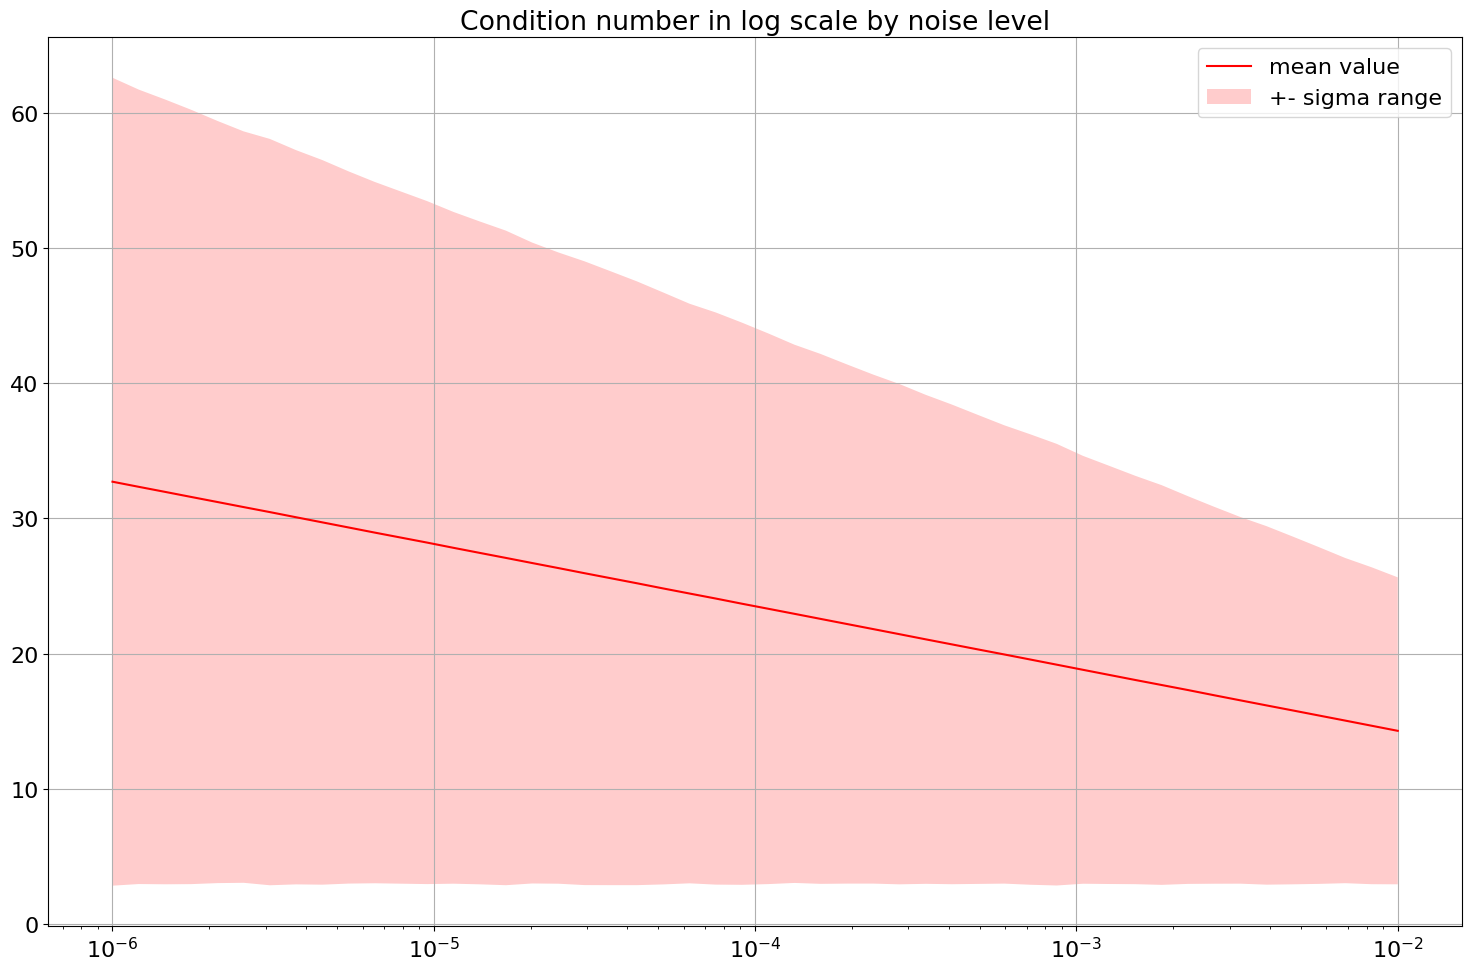

In [53]:
visualise(
    np.log(condition_numbers[:, 0]), 
    np.log(condition_numbers[:, 1]),
    noise_eps_seq, 
    title='Condition number in log scale by noise level',
    greater_than_zero=True,
    log_scale=True
)

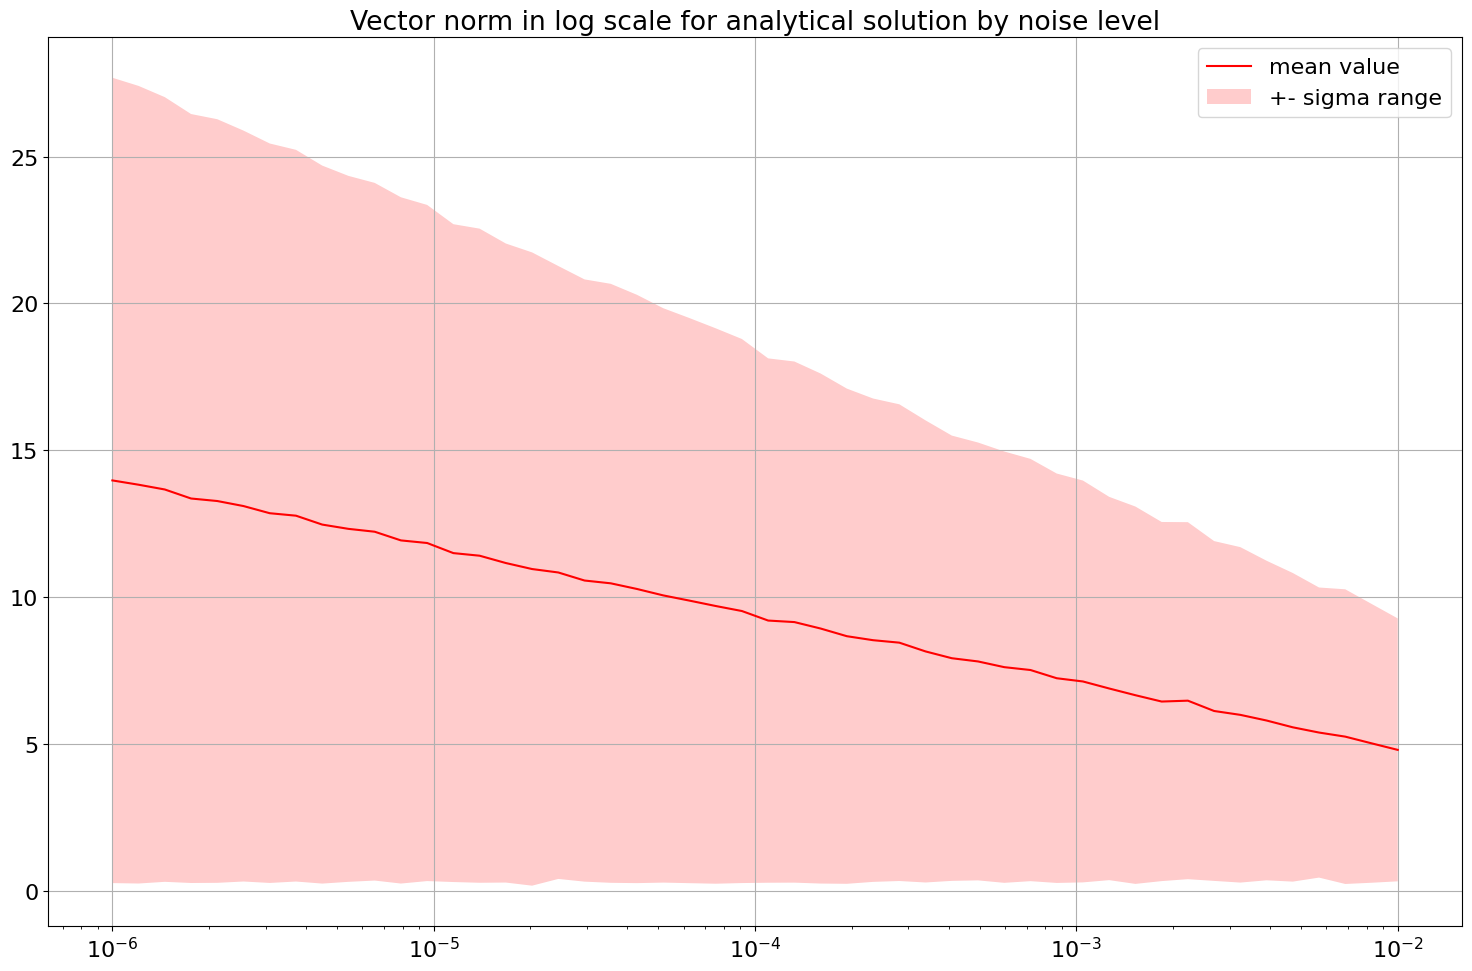

In [54]:
visualise(
    np.log(vector_norms_list[:, 0, 0]), 
    np.log(vector_norms_list[:, 1, 0]),
    noise_eps_seq, 
    title='Vector norm in log scale for analytical solution by noise level',
    greater_than_zero=True,
    log_scale=True
)

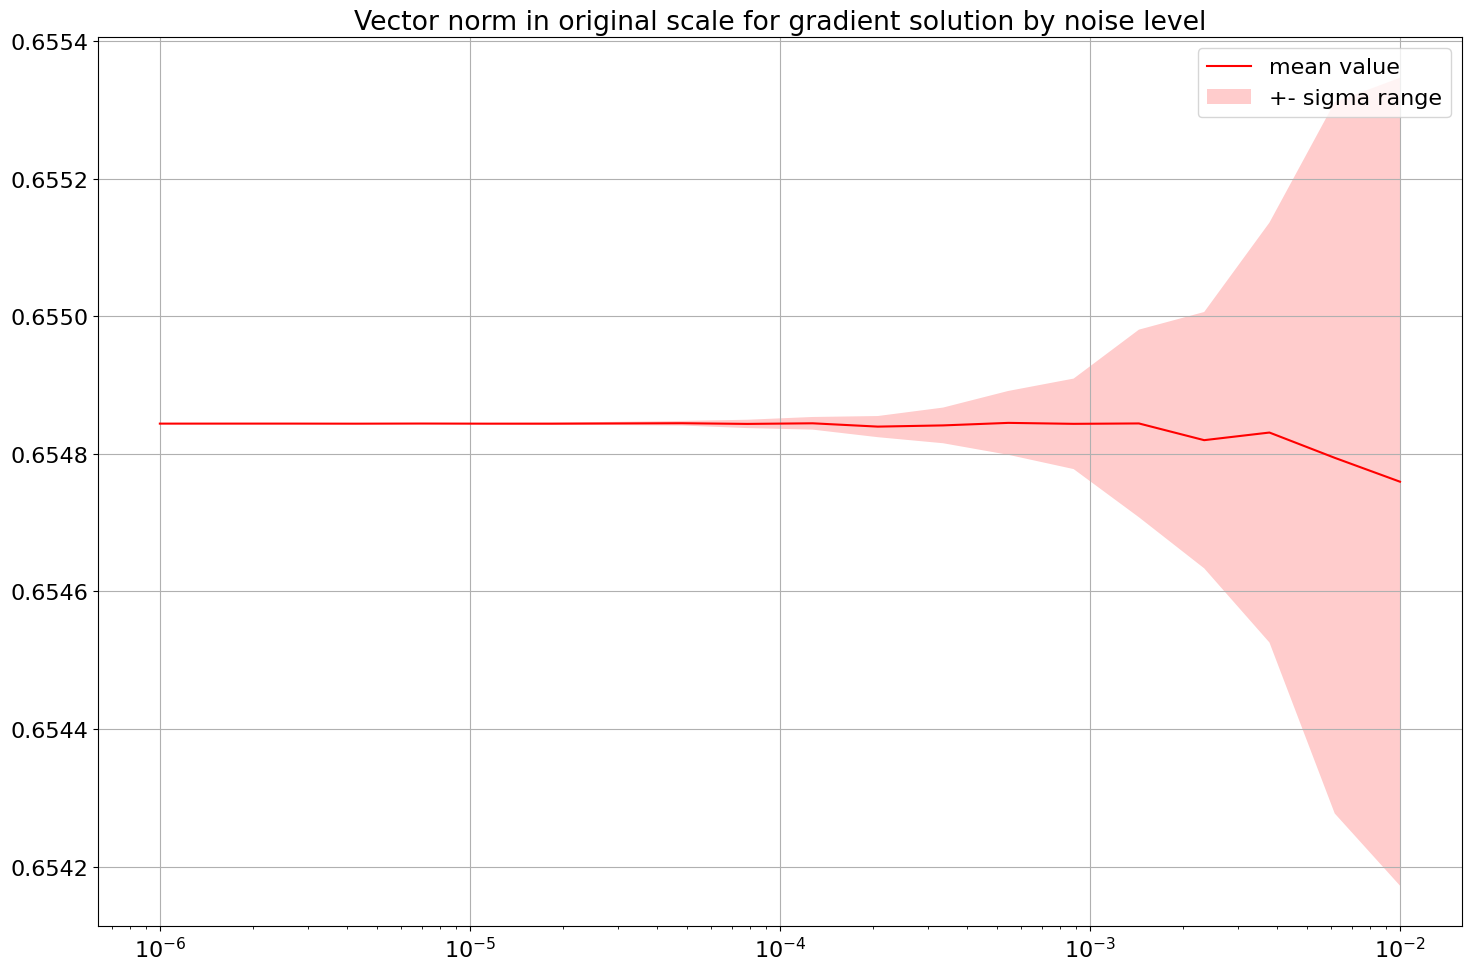

In [22]:
visualise(
    vector_norms_list[:, 0, 1], 
    vector_norms_list[:, 1, 1],
    noise_eps_seq, 
    title='Vector norm in original scale for gradient solution by noise level',
    greater_than_zero=True,
    log_scale=True
)

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [58]:
n_features = 700
n_objects = 100000
num_steps = 150

w_true = np.random.uniform(-2, 2, (n_features, 1))
X = np.random.uniform(-100, 100, size=(n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(-10, 10, (n_objects, 1))

In [59]:
%%time
lr = LinearRegression()
lr.fit(X, Y)
print(f"R2: {lr.score(X,Y)}")

R2: 0.9999670337766094
CPU times: total: 22.1 s
Wall time: 2.96 s


In [60]:
%%time
lr = Ridge(alpha=0.0, solver='sparse_cg')
lr.fit(X, Y)
print(f"R2: {lr.score(X,Y)}")

R2: 0.9999670311611696
CPU times: total: 2.83 s
Wall time: 462 ms


In [62]:
%%time
lr = Lasso(alpha=0.0)
lr.fit(X, Y)
print(f"R2: {lr.score(X,Y)}")

R2: 0.9999670337765774
CPU times: total: 1.94 s
Wall time: 1.39 s


In [65]:
from sklearn.base import BaseEstimator, RegressorMixin
# also ClassifierMixin and TransformerMixin exist

In [66]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    '''LinearRergession with L2 regularization and SGD optimizer
    '''
    def __init__(
        self, C: float=1.0,
        batch_size: int=25,
        lr: float=1e-2,
        num_steps: int=200,
    ) -> None:
        self.C = C
        self.batch_size = batch_size
        self.lr = lr
        self.num_steps = num_steps

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        # this is just copied from above
        for i in range(self.num_steps):
            sample_indices = np.random.randint(n_objects, size=self.batch_size)
            w -= 2 * self.lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X@self.w

In [67]:
n_features = 700
n_objects = 100000
num_steps = 150

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
own_lr = LinearRergessionSGD().fit(x_train, y_train)
print(f'R2: {own_lr.score(x_test, y_test)}')

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)

In [75]:
own_lr = LinearRergessionSGD().fit(x_scaled, y_train)

In [77]:
x_test_scaled = scaler.transform(x_test)

In [78]:
print(f'R2: {own_lr.score(x_test_scaled, y_test)}')

R2: 0.9962605219526885


In [79]:
from sklearn.pipeline import make_pipeline

In [80]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRergessionSGD(),
)

In [81]:
pipe.fit(x_train, y_train)
print(f'R2: {pipe.score(x_test, y_test)}')

R2: 0.9972018719108899
